In [2]:
import pandas as pd
import os
#from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

# Read data

In [3]:
folder = '/home/dorka/BME/nmt/syntax-augmentation-nmt/src/hu_nmt/data_augmentator/data/all_data'
hu_label_file = os.path.join(folder, 'hu_labels')
en_label_file = os.path.join(folder, 'en_labels')
stat_file = os.path.join(folder, 'statistic.tsv')


#df = pd.read_csv(stat_file, sep='\t', names=['hu_nsubj', 'en_nsubj', 'hu_obj', 'en_obj', 'hu_cons', 'en_cons'])
df = pd.read_csv(stat_file, sep='\t')
df.head()

,hu_nsubj,en_nsubj,hu_obj,en_obj,hu_cons,en_cons,same,hu_len,en_len
0,0,0,0,0,True,True,False,11,11
1,2,0,0,1,True,True,False,33,26
2,0,1,1,1,True,True,False,53,43
3,1,2,0,1,True,True,False,101,84
4,2,0,1,1,True,True,False,115,95


In [4]:
hu_label_df = pd.read_csv(hu_label_file, sep=',', names=['label', 'hu_count'])
en_label_df = pd.read_csv(en_label_file, sep=',', names=['label', 'en_count'])

In [6]:
labels = pd.merge(hu_label_df,en_label_df,on='label',how='outer')
labels.fillna(0, inplace=True)
labels['en_count'] = labels['en_count'].astype('int64')
labels['main_label'] = labels.label.apply(lambda x: x.split(':')[0])
labels = labels.drop(labels[labels.label=='punct'].index)
labels = labels.drop(labels[labels.label=='root'].index)
labels = labels.drop(labels[labels.label=='ROOT'].index)

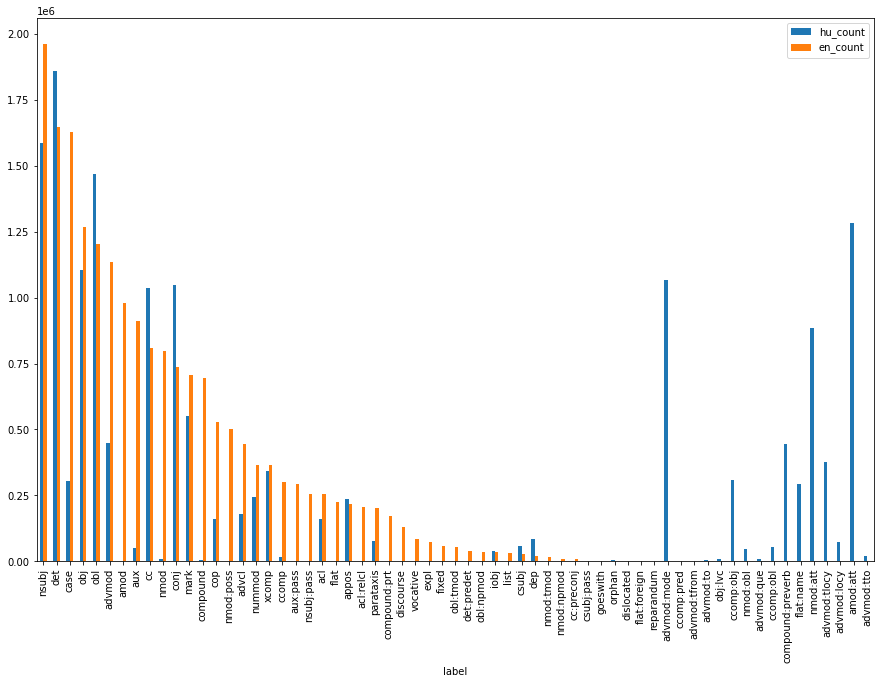

In [7]:
labels = labels.sort_values(by='en_count', ascending=False)
ax = labels.plot.bar(x='label', figsize=(15,10))

In [13]:
labels.sort_values('hu_count', ascending=False)

,label,hu_count,en_count,main_label
6,det,1858787.0,1644525,det
4,nsubj,1583878.0,1962003,nsubj
10,obl,1466946.0,1203632,obl
17,amod:att,1282437.0,0,amod
5,obj,1103850.0,1268777,obj
...,...,...,...,...
55,discourse,0.0,128877,discourse
43,vocative,0.0,84217,vocative
58,expl,0.0,71970,expl
51,obl:npmod,0.0,37537,obl


In [14]:
labels.sort_values('en_count', ascending=False)

,label,hu_count,en_count,main_label
4,nsubj,1583878.0,1962003,nsubj
6,det,1858787.0,1644525,det
20,case,305499.0,1627460,case
5,obj,1103850.0,1268777,obj
10,obl,1466946.0,1203632,obl
...,...,...,...,...
36,obj:lvc,7565.0,0,obj
38,advmod:to,4085.0,0,advmod
40,advmod:tfrom,1001.0,0,advmod
41,ccomp:pred,1890.0,0,ccomp


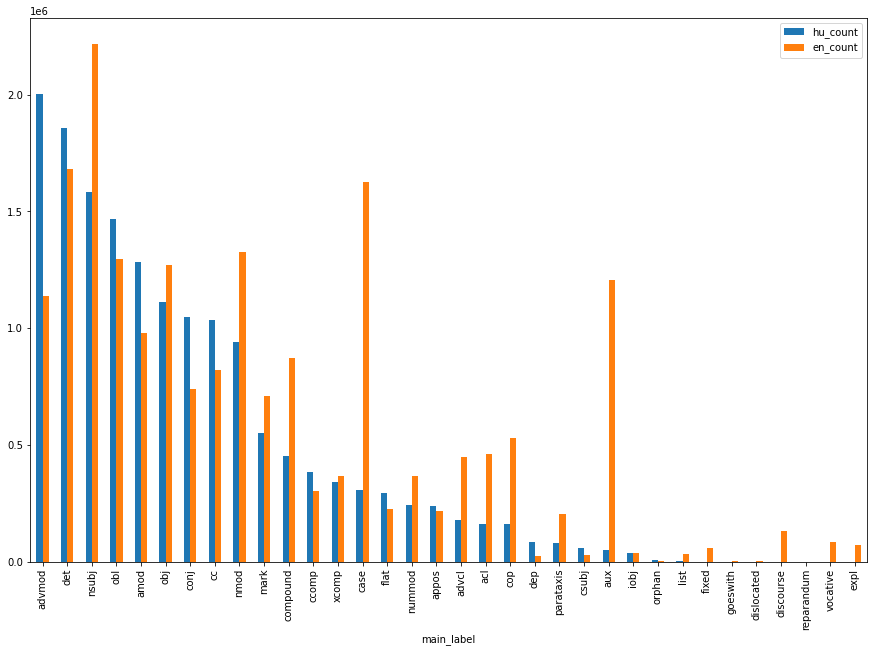

In [34]:
main_labels = labels.groupby(['main_label'], as_index=False).sum()
main_labels = main_labels.sort_values(by='hu_count', ascending=False)
ax = main_labels.plot.bar(x='main_label', figsize=(15,10))

In [7]:
print(f'Hungarian not consecutive: {len(df[df.hu_cons == False])}')
print(f'English not consecutive: {len(df[df.en_cons == False])}')

Hungarian not consecutive: 113
English not consecutive: 9648


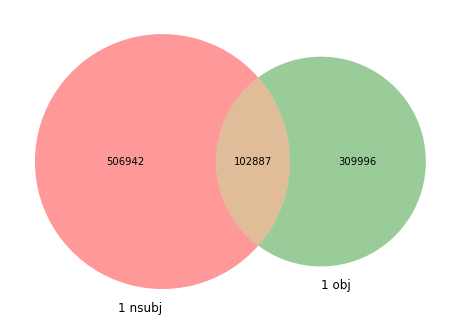

In [26]:
cons = df.loc[(df.hu_cons == True) & (df.en_cons == True)]

nsubj = cons.loc[(cons['en_nsubj'] == 1) & (cons['hu_nsubj'] == 1)] 
obj = cons.loc[(cons['en_obj'] == 1) & (cons['hu_obj'] == 1)]

plt.figure(figsize=(8,8))
nsubj_set = set(nsubj.index)
obj_set = set(obj.index)
none_set = set(cons.index) - nsubj_set - obj_set

#venn3([nsubj_set, obj_set, none_set], ('nsubj', 'obj', 'none'))
venn2([nsubj_set, obj_set], ('1 nsubj', '1 obj'))
plt.show()

In [10]:
print(f'{len(df.loc[(df.en_nsubj < df.hu_nsubj)])}')
print(f'{len(df.loc[(df.en_nsubj > df.hu_nsubj)])}')
print(f'{len(df.loc[(df.en_nsubj == 1) & (df.hu_nsubj == 0)])}')
print(f'{len(df.loc[(df.en_obj == 0) & (df.hu_obj == 1)])}')
print(f'{len(df.loc[(df.en_obj == 1) & (df.hu_obj == 0)])}')
#obj = df.loc[(df['en_obj'] == 1) & (df['hu_obj'] == 1)]


511480
1020914
539709
313681
456732


In [21]:
print(len(df))
print(len(consecutive))

3322594
3312833


In [15]:
print(f'Same source and target sentence: {len(df[df.same == True])}')

Same source and target sentence: 100795


In [29]:
nsubj[['hu_len', 'en_len']].describe()

,hu_len,en_len
count,609829.000000,609829.000000
mean,60.729057,58.420516
std,40.516025,37.540298
min,5.000000,3.000000
25%,32.000000,31.000000
50%,48.000000,47.000000
75%,79.000000,77.000000
max,314.000000,279.000000


In [30]:
obj[['hu_len', 'en_len']].describe()

,hu_len,en_len
count,412883.000000,412883.000000
mean,71.092699,67.310124
std,43.953087,39.891577
min,7.000000,7.000000
25%,38.000000,37.000000
50%,60.000000,57.000000
75%,93.000000,89.000000
max,314.000000,282.000000


In [31]:
both = cons.loc[(cons['en_obj'] == 1) & (cons['hu_obj'] == 1) & (cons['en_nsubj'] == 1) & (cons['hu_nsubj'] == 1)]
both[['hu_len', 'en_len']].describe()

,hu_len,en_len
count,102887.000000,102887.000000
mean,69.455033,65.794269
std,40.234070,37.487316
min,11.000000,10.000000
25%,40.000000,38.000000
50%,59.000000,56.000000
75%,87.000000,84.000000
max,314.000000,247.000000


In [32]:
same_count_nsubj = cons.loc[(cons.hu_nsubj == cons.en_nsubj)]
len(same_count_nsubj)

1786589

In [33]:
same_count_obj = cons.loc[(cons.hu_obj == cons.en_obj)]
len(same_count_obj)

2165466

In [36]:
cons[['hu_nsubj', 'en_nsubj', 'hu_obj', 'en_obj']].describe()

,hu_nsubj,en_nsubj,hu_obj,en_obj
count,3.312833e+06,3.312833e+06,3.312833e+06,3.312833e+06
mean,6.453887e-01,8.483211e-01,4.210436e-01,4.907464e-01
std,8.065258e-01,8.902961e-01,6.774183e-01,7.189277e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,9.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
